# Step2 演習03 線形回帰 scikit-learn
---

Step2 演習01,02ではゼロから線形回帰を実装しました。

Step2演習03では教師あり学習の一種である連続値を返す線形回帰を機械学習のライブラリ scikit-learn を用いて実装します。

ここではライブラリを使うことによって実装方法にどのような変化があるのか感じてほしいと思います。

**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

**本演習の目的**
- 機械学習のライブラリ scikit-learn で線形回帰を実装してみる。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [numpy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント
- [matplotlib-Axes3D](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) matplotlibでの3Dグラフのをサポートする

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番に**順次実行してください。

注意：初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn import datasets
import os
font = {'family':'IPAexGothic'}
plt.rc('font', **font)

## 線形回帰に使うサンプルデータ
今回の演習では、事前に用意したデータセットを使って線形回帰の実装を行います。下のセルを実行するとデータセットが読み込まれます。

一度生成したら同じものを毎回使えるように、データをCSVファイル(Comma-Separated Values コンマで区切られたデータ)で保存しておきます。
<br><br>
** Note： **新たなデータを使いたいときは、CSVファイルの名前を変えるか、コードを変えましょう。

In [2]:
if not os.path.isdir("./dataStep2"):
    os.makedirs("./dataStep2")

if os.path.isfile("./dataStep2/dataStep2_1.csv") == True:
    data = np.loadtxt("./dataStep2/dataStep2_1.csv", delimiter = ",")
    X = data[:,0][:,np.newaxis]
    y = data[:,1][:,np.newaxis]

else:
    X, y = datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=30)
    np.savetxt("./dataStep2/dataStep2_1.csv", np.c_[X, y], delimiter=",")
    y = y[:,np.newaxis]

上のセルを実行したことによりデータセットを "data" に格納しました。下のセルを実行して、dataのshapeを確認しましょう。

In [3]:
data.shape

(100, 2)

<font color='red'>
※Step2 演習02と同じデータセットを使います。

(100,2)と表示されたはずです。
<br>
<br>
このデータセットは、100行2列の行列が格納されています。Xにdataの左側のデータセットを格納し、yにdataの右側のデータを格納しています。

m に訓練例の数を格納しておきます。今回は100個のデータセットになります。

In [4]:
m = y.size # 訓練例の個数

## 生成したデータの表示

可視化は機械学習の実装において大変重要な作業になります。開発を進める前にデータセットの性質を把握し、可視化する癖をつけておきましょう。

今回生成したデータセットのx軸は「街の人口の増減 [百人]」、y軸は「税収の増減 [百万円]」とします。

**【課題５】** 可視化する関数plotData(X, y)を書きましょう。(Step2_02の課題５と同じ課題です。同じ課題なので同じ課題番号が振ってあります。)

参考：[matplotlib.pyplot 公式チュートリアル](http://matplotlib.org/api/pyplot_api.html)

In [5]:
#Coursemale-02 Step2 QuestionNumber5 50e18cf72b791cae57115899f7102f81
def plotData(X, y):
###############ここを穴埋めしてください###############
    #Step2_02の課題１と同じ課題です。
    plt.xlim([-3, 3])
    plt.ylim([-300, 300])
    plt.scatter(X, y)
    plt.xlabel('街の人口の増加[百人]')
    plt.ylabel('税収の増減[百万円]')
    plt.draw()

    
    
    
    
    
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [6]:
%%bash
./validation_client.py male-02 2 5 Step2_03.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



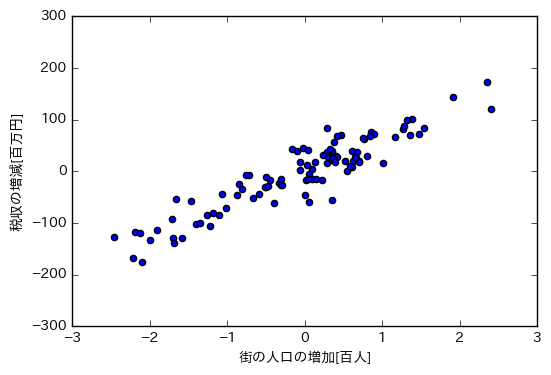

In [7]:
plotData(X, y)

ここまでは演習01 ** データセットの可視化 ** と同じです。

---
## scikit-learn

ここからは機械学習のライブラリ scikit-learn を使った実装を行っていきます。

線形回帰を含めたその他さまざまな機械学習モデルは、<br>
専門家やアルゴリズム・プログラミングに関して特殊な才能を持った人々が作ったライブラリが沢山存在します。

バグが少ないばかりではなく、様々な数理的テクニックを利用して徹底的に高速化されていることも多いです。

今回は、数あるライブラリの中でも特に有名な機械学習ライブラリであるscikit-learnを使います。

- [scikit-learn](http://scikit-learn.org/stable/index.html) 機械学習のライブラリ scikit-learnの公式ドキュメント

まず、ライブラリをインポートします。

- [scikit-learnチュートリアル](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) ：sklearn.linear_model.LinearRegressionについてのページ

In [8]:
from sklearn.linear_model import LinearRegression

今回は線形回帰モデルを用いて学習させるインスタンスを** estimator ** としました。名前は自由に決めることができます。

In [9]:
estimator = LinearRegression()

インスタンス estimator に対して、.fit()で訓練例を引数として与えることで線形回帰の学習を行います。

In [10]:
estimator.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

この３行で基本は終わりです。あとは、結果を出力させましょう。

In [11]:
line_X = np.array([[-3],[3]]) #グラフ画面の端と端
line_y = estimator.predict(line_X) #学習させたインスタンスを使って端と端を予測

その結果をプロットしましょう。

**【課題９】** 結果をプロットするコードを、以下を穴埋めすることで完成させましょう。

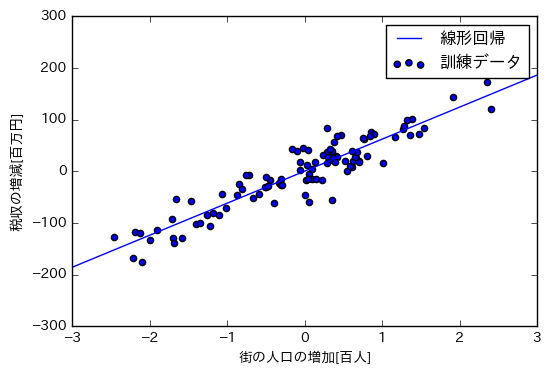

In [15]:
#Coursemale-02 Step2 QuestionNumber9 75991255bb03098fa1dbd612a4654171
import matplotlib.pyplot as plt
#課題１で実装してもらった関数です
plotData(X, y)

#このセル内で直前にプロットしたものに上書きしていきます
plt.hold(True)

#グラフの端と端の予測値であるline_x,line_yをライブラリ[matplotlib.pyplot]のplotを用いてその間に直線で引くことで、回帰直線を掃引します。
###############ここを穴埋めしてください###############
plt.plot(line_X, line_y)
######################################################

#念のため、グラフの端をもう一度指定しておきます。
plt.xlim([-3,3])
plt.ylim([-300,300])

#凡例を入れます。
plt.legend((u'線形回帰',u'訓練データ'))

plt.show()

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [16]:
%%bash
./validation_client.py male-02 2 9 Step2_03.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



---
## おわりに

今回は機械学習最初の一歩、線形回帰を 演習01,02ではゼロから、演習03では scikit-learn で実装しました。

これで線形回帰のアルゴリズムがどのようなことを行っているのか、よく分かったと思います。

また、scikit-learnの使い方を学びました。scikit-learnを用いれば線形回帰を含めた様々な機械学習モデルをほとんど同じ要領で扱うことが出来ます。

[公式サイト](http://scikit-learn.org)を開いて、他にどのようなことができるのか眺めてみましょう。

あまりに色々なことができるので当惑されるかもしれませんが、実際に使うことで慣れていきましょう。

おつかれさまでした。